## Images

This task should make you familiar with the general image processing libraries and their use to deal with images in Python. We will use Pillow to read in the images, scipy to convolve them and numpy for some general functions. You can easily find the documentation of each library via Google. 

The functions are implemented in Images.py

----

First, we import everything we will need to run the code. We will use the package autoreload to reload the changes done in the files automatically.

In [44]:
%load_ext autoreload
%autoreload 1
%aimport images

import numpy as np
import matplotlib.pyplot as plt
import images

# Optionally: Adjust size of image plot here 
plt.rcParams['figure.figsize'] = [5,5] 
plt.rcParams['figure.dpi'] = 150


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


----

Firstly, we read in the image to enable dealing with it. Since we are using Pillow, the type of the image is a PIL JPEG Image. Its pixels are uint8. You should see the mandrill below.

Datatype of img: <class 'PIL.JpegImagePlugin.JpegImageFile'>


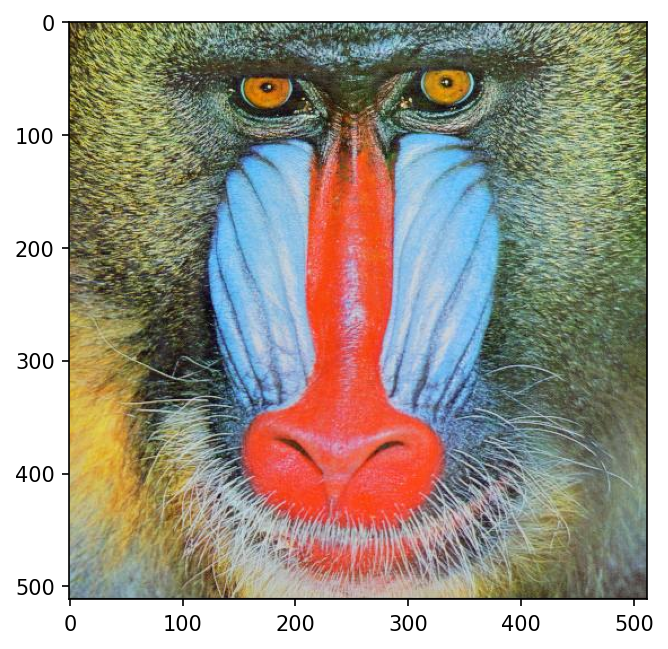

In [45]:
image = images.read_img('images/mandrill_color.jpg')
print(f'Datatype of img: {type(image)}')
plt.imshow(image)


----

Implement the function convert which converts the RGB image to a numpy array as well as transforms its pixel values from [0,255] to [0,1]. Now we are able to use numpy!

Datatype of img_float: <class 'numpy.ndarray'>, min: 0.0, max: 1.0
Image shape: (512, 512, 3)
[[[0.63921569 0.57647059 0.37647059]
  [0.29803922 0.24313725 0.05882353]
  [0.21176471 0.15294118 0.        ]
  ...
  [0.4745098  0.47843137 0.35294118]
  [0.59215686 0.60392157 0.48235294]
  [0.67058824 0.68235294 0.56078431]]

 [[0.51764706 0.45490196 0.25098039]
  [0.43921569 0.38431373 0.19215686]
  [0.19215686 0.13333333 0.        ]
  ...
  [0.5372549  0.54117647 0.40784314]
  [0.56862745 0.58431373 0.44705882]
  [0.54117647 0.55686275 0.41960784]]

 [[0.34117647 0.28235294 0.06666667]
  [0.55686275 0.50588235 0.30196078]
  [0.25882353 0.2        0.03137255]
  ...
  [0.35686275 0.36862745 0.2       ]
  [0.36862745 0.39215686 0.21960784]
  [0.30196078 0.3254902  0.15294118]]

 ...

 [[0.53333333 0.59607843 0.58431373]
  [0.53333333 0.59607843 0.58431373]
  [0.51372549 0.58823529 0.57254902]
  ...
  [0.35686275 0.3372549  0.32156863]
  [0.34509804 0.3254902  0.30980392]
  [0.34509804 0.325

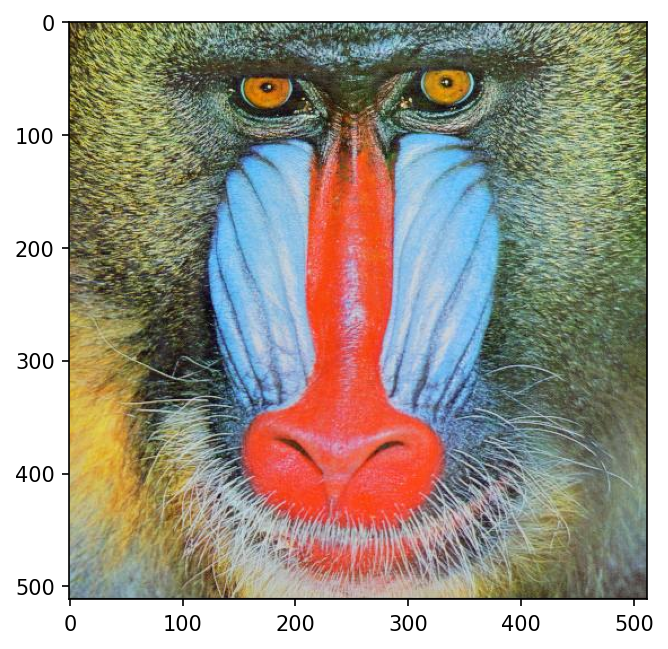

In [59]:
image_float = images.convert(image)
plt.imshow(image_float)
print(f'Datatype of img_float: {type(image_float)}, min: {np.min(image_float)}, max: {np.max(image_float)}')
print(f'Image shape: {image_float.shape}')

----

Implement switch_channels which swaps the red and the green channel of the image.

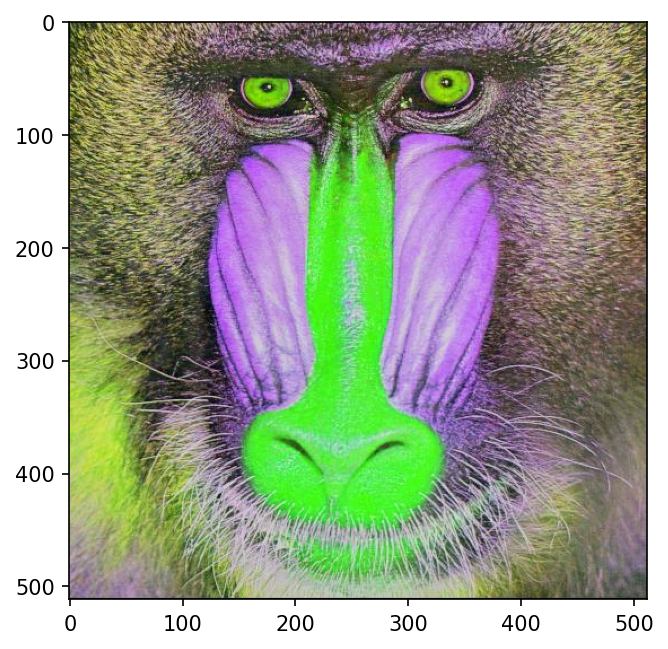

In [62]:
image_swapped = images.switch_channels(image_float)
plt.imshow(image_swapped)

----

Implement the function image_mark_green() which operates on image_float and generates a mask with values v == 1 if the green channel of the image is greater or equal than 0.7, otherwise zero.

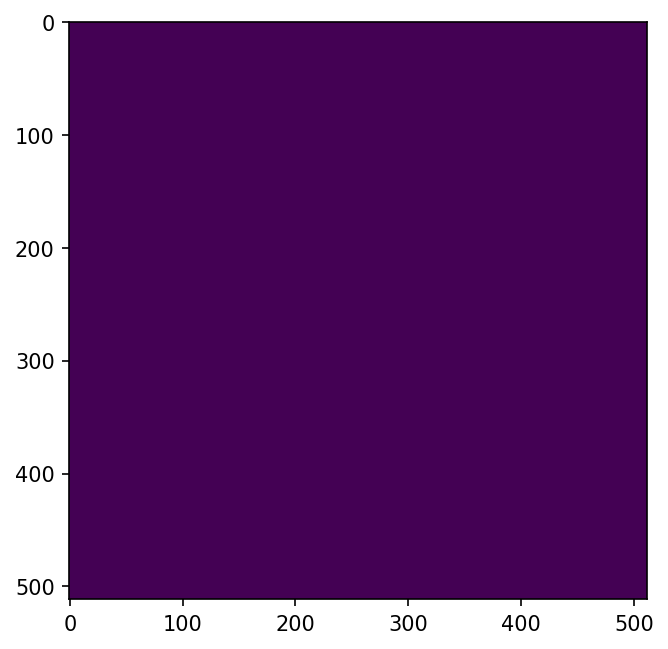

In [67]:
image_marked_green = images.image_mark_green(image_float)
plt.imshow(image_marked_green)

Now we combine the mask and the image: In image_masked, set each pixel of the input image to zero if the mask is 1.

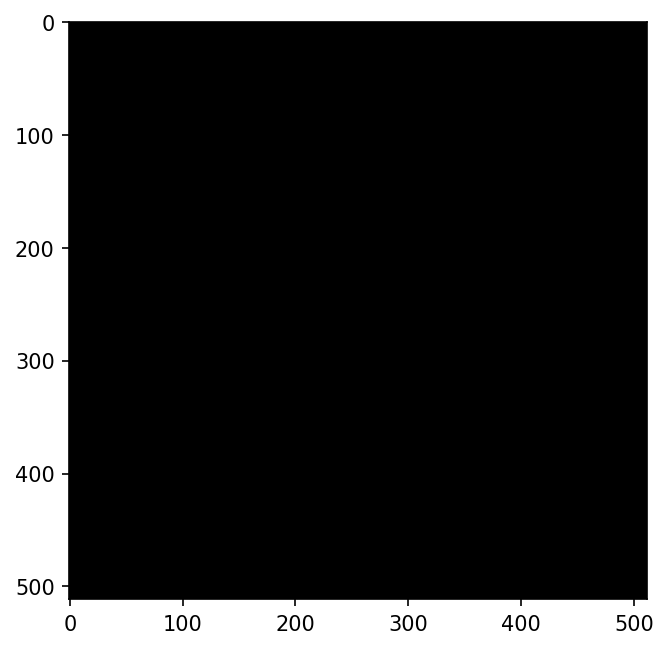

In [68]:
image_masked = images.image_masked(image_float, image_marked_green)
plt.imshow(image_masked)

----

Some algorithms in Computer Vision operate on grayscale rather than RGB image. With the function grayscale, we want to convert the image from a three channel RGB to a one channel grayscale image.

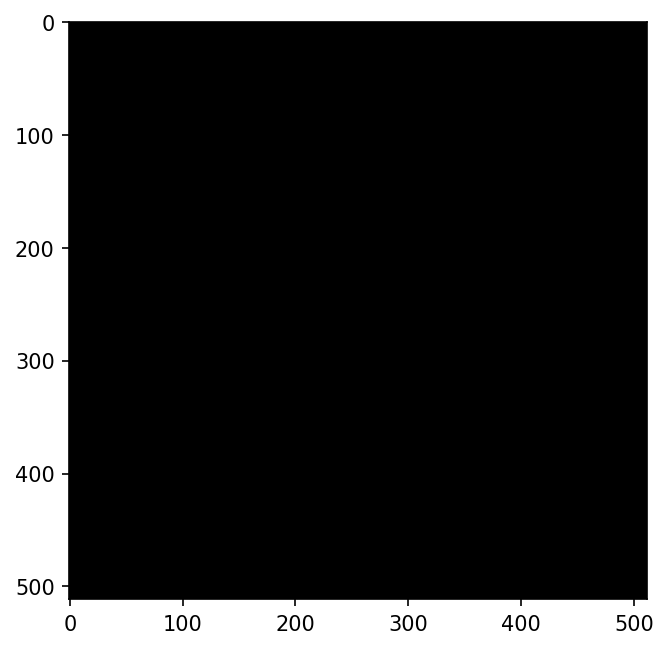

In [ ]:
image_grayscale = images.grayscale(image_float)
plt.imshow(image_grayscale, cmap='gray')


Next, we want to have a look at array manipulation techniques provided by numpy. Implement cut_and_reshape which cuts the image in half in x direction and stacks together the two parts in y dimension. Make sure the output looks like the task description.

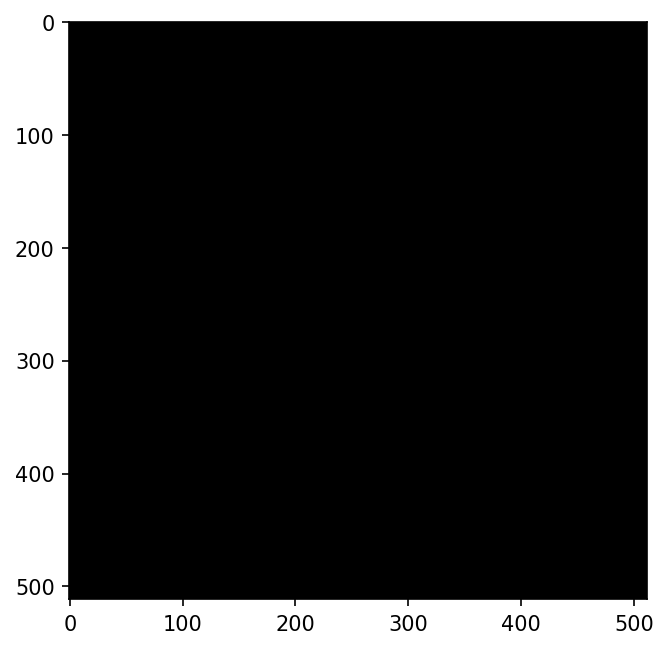

In [ ]:
image_reshaped = images.cut_and_reshape(image_grayscale)
plt.imshow(image_reshaped, cmap='gray')

-----

As we saw in the lecture, convolution is one of the most important operations for Computer Vision. Implement your own convolution in filter_image, take a look at the lecture in case you are not sure how it works. Regarding the border, we pad the images with zeros (np.pad). The gaussian kernel is already provided in the function. The output should look blurred compared to the input.

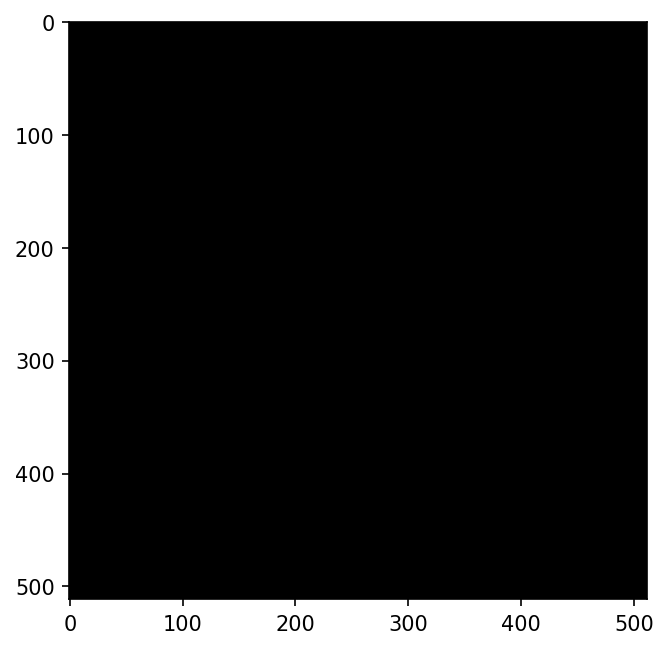

In [ ]:
filtered_image = images.filter_image(image_swapped)
plt.imshow(filtered_image)

------

We can also make use of convolutions to detect edges in the image. Implement a sobel filter to extract horizontal edges in the function horizontal_edges. For convolution, we will use scipy.ndimage.correlate(____, mode='constant'). The plot below is binarized accordingly (image_edges > 0.5) for improved visualization.

In [ ]:
image_edges = images.horizontal_edges(image_reshaped)
plt.imshow(image_edges > 0.3, cmap='gray')

Error in callback <function _draw_all_if_interactive at 0x000001392ABBD440> (for post_execute):


ValueError: Unsupported dtype

ValueError: Unsupported dtype

<Figure size 750x750 with 1 Axes>